In [22]:
from keras import layers
from keras import models
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D

from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3, activation='softmax'))


model.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])



In [23]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)      

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/Users/ryosimon/Documents/CCLab/fashsionSorting/fashsionSortingTest2/train'
validation_dir = '/Users/ryosimon/Documents/CCLab/fashsionSorting/fashsionSortingTest2/validation'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    # batch_size=20,
    batch_size=30,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    # batch_size=20,
    batch_size=30,
    class_mode='categorical')



Found 900 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


In [25]:
history = model.fit_generator(train_generator,
                            steps_per_epoch=30,
                            epochs=50,
                            validation_data=validation_generator,
                            validation_steps=15)

Epoch 1/50
 3/30 [==>...........................] - ETA: 27s - loss: 1.3365 - acc: 0.3667

KeyboardInterrupt: 

In [0]:
model.save('/Users/ryosimon/Documents/CCLab/fashsionSorting/fashsionSortingTest2/fashsion_model_1')

In [9]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
model = load_model('/Users/ryosimon/Documents/CCLab/fashsionSorting/fashsionSortingTest2/fashsion_model_1')

test_dir = '/Users/ryosimon/Documents/CCLab/fashsionSorting/fashsionSortingTest2/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=30,
    class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=15)
print('test loss:', test_loss)
print('test acc:', test_acc)

Found 450 images belonging to 3 classes.
/Users/ryosimon/anaconda3/envs/cclab/lib/python3.6/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
test loss: 1.8567930459976196
test acc: 0.48444443941116333


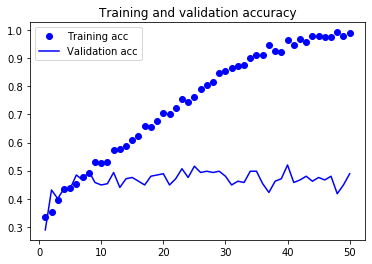

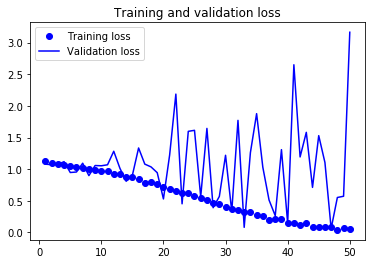

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1) #これ謎


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()